## Overview

This Jupyter notebook focuses on analyzing and preprocessing a house sale data for training a machine learning model to predict house prices. This will follow these general steps:

- Explore the dataset structure, features, and distributions.
- Handle missing values and perform necessary data transformations.
- Utilize data visualization for exploring correlations and relationships between features.

## Dataset Information

The dataset used in this analysis contains real estate listings in the US broken by State and zip code, downloaded from https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset



#### Exploratory Data Analysis


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('realtor-data.csv')
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


#### Numerical and Categorical Features

In [4]:
# Identify Numerical and Categorical Features

numerical_columns = df.select_dtypes(include=['number']).columns
numerical_variables = numerical_columns.tolist()
print("Numerical Features Count:", len(numerical_variables))
print("Numerical Features:", numerical_variables)

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_variables = categorical_columns.tolist()
print("Categorical Features Count:", len(categorical_variables))
print("Categorical Features:", categorical_variables)

Numerical Features Count: 6
Numerical Features: ['bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'price']
Categorical Features Count: 4
Categorical Features: ['status', 'city', 'state', 'prev_sold_date']


In [5]:
#View statistical properties of categorical variables
categorical_summary = df[categorical_columns].describe()
print(categorical_summary)

          status           city       state prev_sold_date
count     904966         904894      904966         445865
unique         2           2487          18           9870
top     for_sale  New York City  New Jersey     2018-07-25
freq      903373          47502      231958            317


In [6]:
# Missing values in categorical variables
for col in categorical_columns:
    missing_count = df[col].isnull().sum()
    missing_percentage = (missing_count / len(df[col])) * 100
    print(f"{col}: {missing_count} missing values ({missing_percentage:.2f}%)")

status: 0 missing values (0.00%)
city: 72 missing values (0.01%)
state: 0 missing values (0.00%)
prev_sold_date: 459101 missing values (50.73%)


In [7]:
#View statistical properties of numerical variables
numerical_summary = df[numerical_columns].describe()
print(numerical_summary)

                 bed           bath       acre_lot       zip_code  \
count  775126.000000  791082.000000  638324.000000  904762.000000   
mean        3.332190       2.484236      17.317292    6519.464582   
std         2.065312       1.931622     970.707378    3816.713093   
min         1.000000       1.000000       0.000000     601.000000   
25%         2.000000       2.000000       0.110000    2908.000000   
50%         3.000000       2.000000       0.290000    6811.000000   
75%         4.000000       3.000000       1.150000    8854.000000   
max       123.000000     198.000000  100000.000000   99999.000000   

         house_size         price  
count  6.120800e+05  9.048950e+05  
mean   2.138437e+03  8.774382e+05  
std    3.046600e+03  2.457698e+06  
min    1.000000e+02  0.000000e+00  
25%    1.132000e+03  2.685000e+05  
50%    1.650000e+03  4.750000e+05  
75%    2.495000e+03  8.300000e+05  
max    1.450112e+06  8.750000e+08  


In [8]:
# Missing values in numerical variables
for col in numerical_columns:
    missing_count = df[col].isnull().sum()
    missing_percentage = (missing_count / len(df[col])) * 100
    print(f"{col}: {missing_count} missing values ({missing_percentage:.2f}%)")

bed: 129840 missing values (14.35%)
bath: 113884 missing values (12.58%)
acre_lot: 266642 missing values (29.46%)
zip_code: 204 missing values (0.02%)
house_size: 292886 missing values (32.36%)
price: 71 missing values (0.01%)


#### Handling duplicates and misisng values

In [9]:
print('number of duplicates:',df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.shape

number of duplicates: 794865


(110101, 10)

#### Variable Relationships & Correlation

In [10]:
nulls = df.isnull().sum()
fig = px.bar(y=nulls.index, x=nulls.values, text=nulls.values, orientation='h', height=400, width=600)
fig.update_layout(yaxis_title="Variables", xaxis_title="Null Counts")
fig.update_xaxes(range=[0, len(df)])
fig.show()

In [11]:
# Drop rows with missing values in the target variable
df.dropna(subset=['price'], inplace=True)

# Fill missing values with mode 
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)

which_method = 1
if which_method == 1: # Fill missing values with mode 
    df['acre_lot'].fillna(df['acre_lot'].mode()[0], inplace=True)
    df['house_size'].fillna(df['house_size'].mode()[0], inplace=True)
elif which_method == 2: # Use KNeighborsRegressor for imputing missing values
    features_to_impute = ['acre_lot', 'house_size']
    scaler = StandardScaler()
    df[features_to_impute] = scaler.fit_transform(df[features_to_impute])
    knn_imputer = KNNImputer(n_neighbors=5, n_jobs=-1)
    df[features_to_impute] = knn_imputer.fit_transform(df[features_to_impute])
else:
    raise ValueError("Invalid method: {}".format(which_method))

# Drop some rows with missing values
df.dropna(subset=['zip_code', 'city'], inplace=True)

# Drop the irrelevant features (it has more than 50% missing values)
df.drop('prev_sold_date', axis=1, inplace=True)

# Verify that missing values are imputed
print("Number of missing values after imputing:")
print(df.isnull().sum())


Number of missing values after imputing:
status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
price         0
dtype: int64


#### Outlier Detection and Handling

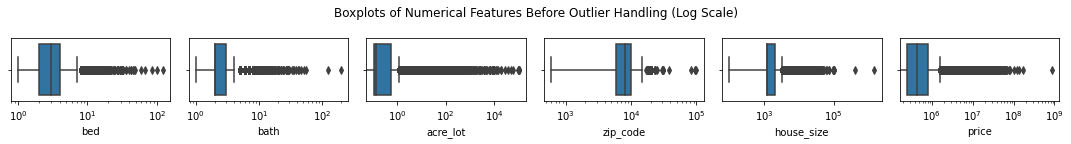

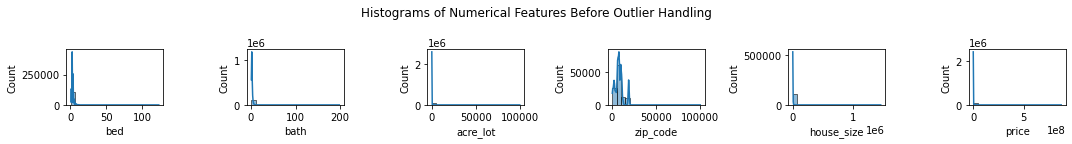

In [12]:
# Plot boxplots and histograms for numerical features

numerical_columns = ['bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'price']

plt.figure(figsize=(15, 2))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1,6,i)
    sns.boxplot(x=df[column])
    plt.xscale('log') 
plt.suptitle('Boxplots of Numerical Features Before Outlier Handling (Log Scale)')    
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 2))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1,6,i)
    sns.histplot(df[column], kde=True, bins=20)
plt.suptitle('Histograms of Numerical Features Before Outlier Handling')    
plt.tight_layout()
plt.show()

In [13]:
# Apply IQR method to handle outliers

outlier_percentage = {}
upper_threshold = {}
lower_threshold = {}
for variable in numerical_columns:
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    upper_threshold[variable] = Q3 + 1.5 * IQR
    lower_threshold[variable] = Q1 - 1.5 * IQR
    
    # Count the number and percentage of outliers
    num_upper_outliers = sum(df[variable] > upper_threshold[variable])
    num_lower_outliers = sum(df[variable] < lower_threshold[variable])
    total_outliers = num_upper_outliers + num_lower_outliers
    total_data_points = len(df)
    percentage_outliers = (total_outliers / total_data_points) * 100
    outlier_percentage[variable] = percentage_outliers

print("Percentage of outliers for each variable:")
for variable, percentage in outlier_percentage.items():
    print(f"{variable}: {percentage:.2f}%")


Percentage of outliers for each variable:
bed: 2.07%
bath: 6.50%
acre_lot: 16.27%
zip_code: 9.32%
house_size: 8.90%
price: 10.58%


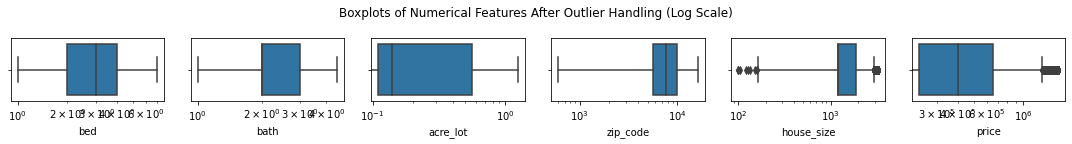

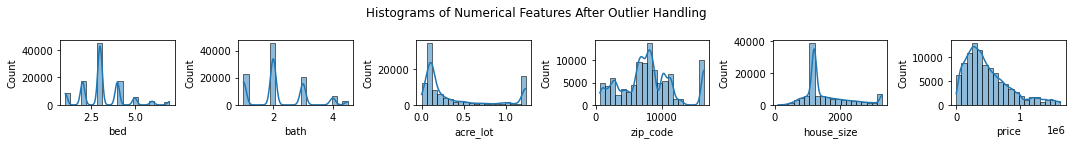

In [14]:
df.drop(df[df['price'] <= lower_threshold['price']].index, axis=0, inplace=True)
df.drop(df[df['price'] >= upper_threshold['price']].index, axis=0, inplace=True)


columns = ['bed', 'bath', 'acre_lot', 'zip_code', 'house_size']
for variable in columns:
    df[variable] = np.where(df[variable] > upper_threshold[variable], upper_threshold[variable], df[variable])
    df[variable] = np.where(df[variable] < lower_threshold[variable], lower_threshold[variable], df[variable])


plt.figure(figsize=(15, 2))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1,6,i)
    sns.boxplot(x=df[column])
    plt.xscale('log') 
plt.suptitle('Boxplots of Numerical Features After Outlier Handling (Log Scale)')    
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 2))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1,6,i)
    sns.histplot(df[column], kde=True, bins=20)
plt.suptitle('Histograms of Numerical Features After Outlier Handling')    
plt.tight_layout()
plt.show()

In [15]:
df.describe(include='all')

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
count,98406,98406.000000,98406.000000,98406.000000,98406,98406,98406.000000,98406.000000,9.840600e+04
unique,2,NaN,NaN,NaN,2460,18,NaN,NaN,NaN
top,for_sale,NaN,NaN,NaN,Philadelphia,New Jersey,NaN,NaN,NaN
freq,98171,NaN,NaN,NaN,5315,30569,NaN,NaN,NaN
mean,NaN,3.116700,2.194505,0.393153,NaN,NaN,7904.235311,1566.272179,4.873033e+05
std,NaN,1.245423,0.930313,0.436386,NaN,NaN,4058.024024,704.101135,3.479445e+05
min,NaN,1.000000,1.000000,0.000000,NaN,NaN,601.000000,100.000000,0.000000e+00
25%,NaN,2.000000,2.000000,0.110000,NaN,NaN,5667.000000,1200.000000,2.320000e+05
50%,NaN,3.000000,2.000000,0.140000,NaN,NaN,7753.000000,1200.000000,3.995000e+05
75%,NaN,4.000000,3.000000,0.560000,NaN,NaN,10065.000000,1890.750000,6.600000e+05


#### Variable Relationships & Correlation

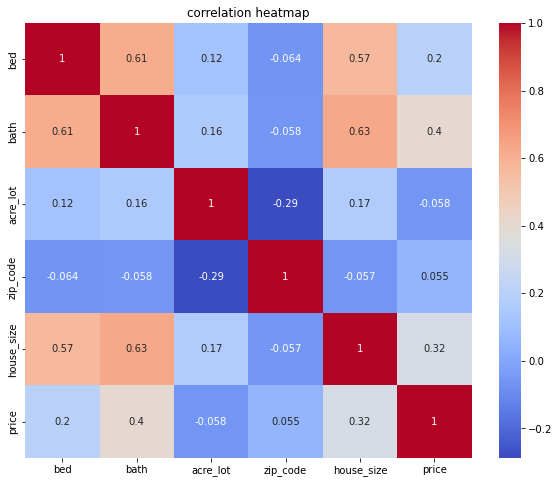

In [16]:
#check correlation and relationships between variables 
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

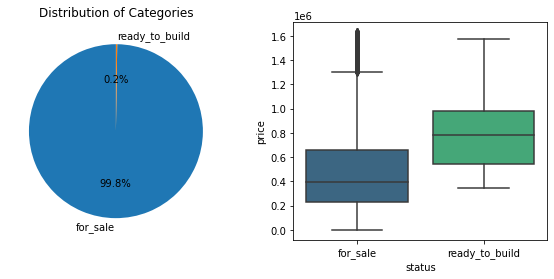

In [17]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
status_counts = df['status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Categories')

plt.subplot(1,2,2)
sns.boxplot(x='status', y='price', data=df, palette='viridis')

plt.show()

The majority of the data are ready for sale.

In [18]:
# Define a new feature price per sqft
df['price_per_sqft'] = df['price'] / df['house_size']

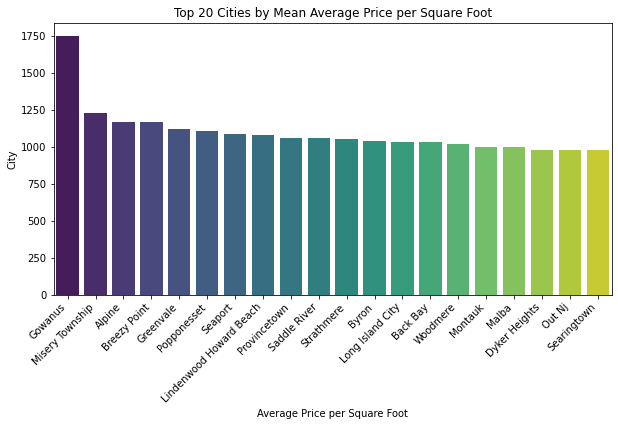

In [19]:
#Group by city and calculate the average price per square foot
df_top20_city=df.groupby('city')['price_per_sqft'].mean().reset_index().sort_values(by='price_per_sqft', ascending=False).head(20)

plt.figure(figsize=(10, 5))
sns.barplot(x='city', y='price_per_sqft', data=df_top20_city, palette='viridis')
plt.xlabel('Average Price per Square Foot')
plt.ylabel('City')
plt.title('Top 20 Cities by Mean Average Price per Square Foot')
plt.xticks(rotation=45, ha='right') 
plt.show()

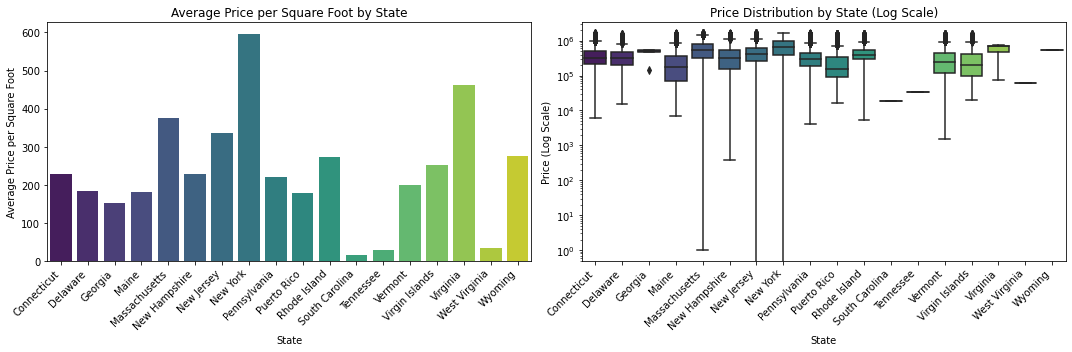

In [20]:
#Group by state and calculate the average price per square foot
price_per_sqft_by_state = df.groupby('state')['price_per_sqft'].mean()

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x=price_per_sqft_by_state.index, y=price_per_sqft_by_state.values, palette='viridis')
plt.title('Average Price per Square Foot by State')
plt.xlabel('State')
plt.ylabel('Average Price per Square Foot')
plt.xticks(rotation=45, ha='right')  

plt.subplot(1,2,2)
sns.boxplot(x='state', y='price', data=df, order=price_per_sqft_by_state.index, palette='viridis')
plt.yscale('log') 
plt.title('Price Distribution by State (Log Scale)')
plt.xlabel('State')
plt.ylabel('Price (Log Scale)')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

We can see that New York has the highest average price per square foot, followed by Massachusetts, Virgin Islands, Virginia, and New Jersey. Interestingly, even in states with lower averages, high-priced houses can still be sold.

In [21]:
pivot_table = pd.pivot_table(df, values='price', index='state', columns='bed', aggfunc='mean').sort_values(by=3.0, ascending=False)
pivot_table

bed,1.0,2.0,3.0,4.0,5.0,6.0,7.0
state,,,,,,,
New York,647553.933711,729833.064454,604408.979005,813924.099276,937018.946324,1.002707e+06,1.083442e+06
Virginia,NaN,NaN,555571.428571,NaN,NaN,NaN,NaN
Wyoming,NaN,NaN,535000.000000,NaN,NaN,NaN,NaN
Massachusetts,549703.209964,582111.422734,478342.911016,740811.938007,796312.252688,6.497563e+05,7.737505e+05
Rhode Island,266103.645833,398633.224959,426516.050000,568351.644760,574060.959732,4.701709e+05,4.951021e+05
New Jersey,283979.375877,341217.461123,409554.190827,600257.160318,764747.372257,6.884564e+05,6.626250e+05
Connecticut,199299.727069,290884.758920,353637.518482,568514.343442,669124.745814,4.286191e+05,4.518525e+05
New Hampshire,202119.546512,379761.742701,335417.270716,650615.491139,657904.340659,5.195868e+05,5.509605e+05
Delaware,165476.944444,243655.525714,309761.752239,468061.607143,543027.779661,6.127850e+05,7.122500e+05


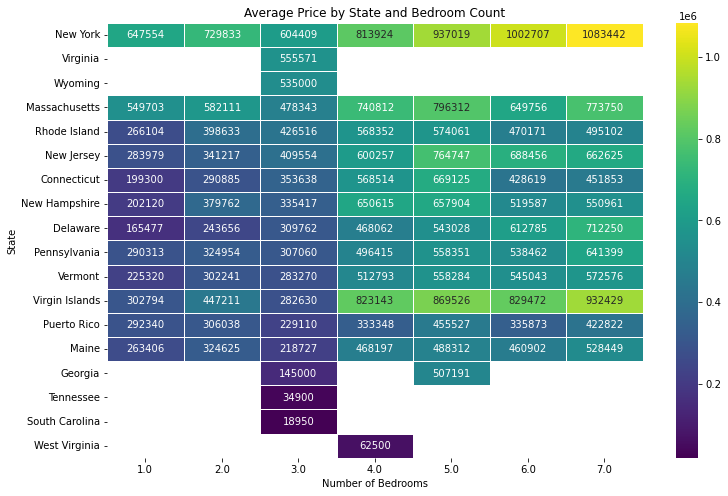

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".0f", linewidths=.5 )
plt.title(f'Average Price by State and Bedroom Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('State')
plt.show()

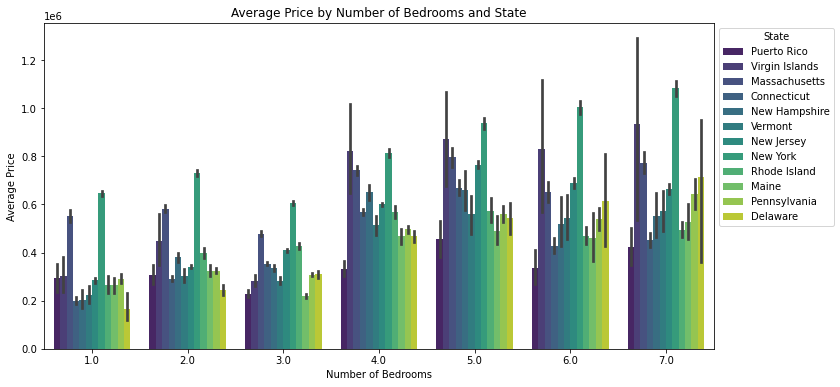

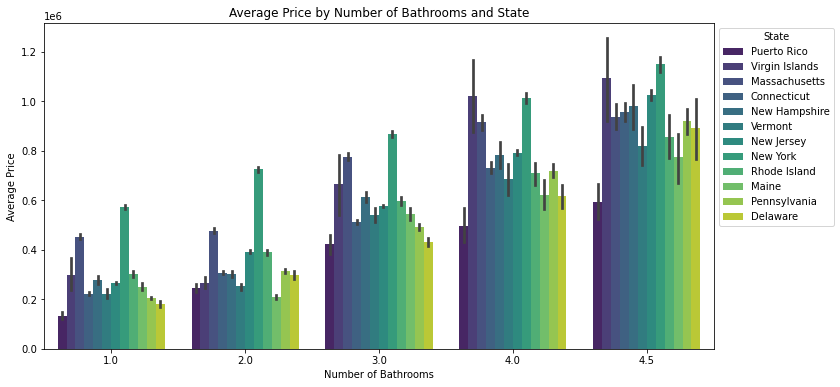

In [23]:
states_of_interest = pivot_table.dropna(axis=0).index.tolist() #states without NaN values in the pivot table
df_filtered = df[df['state'].isin(states_of_interest)]

# create a bar plot for 'bed'
plt.figure(figsize=(12, 6))
sns.barplot(x='bed', y='price', hue='state', data=df_filtered, palette='viridis')
plt.title('Average Price by Number of Bedrooms and State')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.legend(title='State', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# create a bar plot for 'bath'
plt.figure(figsize=(12, 6))
sns.barplot(x='bath', y='price', hue='state', data=df_filtered, palette='viridis')
plt.title('Average Price by Number of Bathrooms and State')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.legend(title='State', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

We can see that in most states, there is a general trend of increasing average prices as the number of bedrooms and bathrooms in a house increases. States like New York and Massachusetts generally have higher average prices across all bedroom counts compared to other states. Some states, such as Wyoming, Virginia, Georgia, Tennessee, South Carolina, and West Virginia, have NaN values for certain bedroom counts, highlighting the need for more comprehensive data.

We have already seen a weak positive correlation between the number of bedrooms (correlation coefficient: 0.2) and bathrooms (correlation coefficient: 0.4) with the house price. Visualizations and mean values suggest a general trend of increasing prices with a growing number of bedrooms and bathrooms.

In [24]:
#export the preprocessed data to a CSV file
df.to_csv("Cleansed_Data.csv", index=False)